Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import raw dataset and select columns needed for ML

In [2]:
cols = ['user_id', 'therm_pref', 'therm_sens','met', 'age', 'gender', 'weight',
       'height','clo','avg_wrist_st', 'avg_ankle_st','avg_velocity','avg_co2',
       'avg_heartrate', 'avg_globe_temp','avg_testo_hum', 'avg_testo_temp1',
        'avg_temp_out', 'avg_hum_out']
ml_data=pd.read_csv('../data/dvg_climate_chamber_exp_final_data.csv', usecols=cols)

In [3]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          1502 non-null   object 
 1   therm_sens       1502 non-null   float64
 2   therm_pref       1502 non-null   int64  
 3   met              1502 non-null   float64
 4   age              1502 non-null   int64  
 5   gender           1502 non-null   int64  
 6   weight           1502 non-null   int64  
 7   height           1502 non-null   int64  
 8   avg_wrist_st     1501 non-null   float64
 9   avg_ankle_st     1501 non-null   float64
 10  avg_heartrate    1501 non-null   float64
 11  avg_globe_temp   1502 non-null   float64
 12  avg_testo_hum    1502 non-null   float64
 13  avg_testo_temp1  1502 non-null   float64
 14  avg_co2          1502 non-null   float64
 15  avg_velocity     1316 non-null   float64
 16  avg_temp_out     1502 non-null   float64
 17  avg_hum_out   

Data Cleaning

In [ ]:
def wrangle_data():

   
    df=pd.DataFrame(ml_data)

    unique_ids = df['user_id'].unique()
    id_map = {old_id: new_id for new_id, old_id in enumerate(unique_ids, start=1)}

    # Replace user_id column with mapped numbers
    df['user_id'] = df['user_id'].map(id_map)

    #map gender with values
    gender_map = {1:'Male',2:'Female'}
    df['gender'] =df['gender'].map(gender_map)

    #map thermal preference with the standard 3 point value
    pref_map = {1:-1,2: 0,3: 1}
    df['therm_pref'] =df['therm_pref'].map(pref_map)
    
    sens_map = {1:-3, 2:-2, 3:-1, 4:0, 5:1, 6:2, 7:3}
    df['therm_sens'] =df['therm_sens'].map(sens_map)

    #Calculate BMI value
    df['BMI'] = df['weight']/((df['height']/100)**2) 

    #Calculate mean radiant temperature (mrt) from globe temperature, velovity and air temperature
    df['T_mrt'] = ((df['avg_globe_temp'] + 273.15)**4 + 2.5e8 * (df['avg_velocity'])**0.6 * (df['avg_globe_temp'] - df['avg_testo_temp1']))**0.25 - 273.15
    
    #drop columns weight and height since BMI is included
    df.drop(columns = ['weight','height',], inplace=True)
    
      
    #rename columns to simplify
    df.rename(columns={'user_id': 'ID', 'therm_pref':'TPV', 'therm_sens':'TSV', 'avg_wrist_st':'w_st','avg_ankle_st':'a_st','avg_velocity':'V_a',
                      'avg_testo_temp1':'T_in','avg_co2':'CO_2','avg_testo_hum':'RH_in','avg_heartrate':'HR',
                     'avg_globe_temp':'T_g','avg_temp_out':'T_out','avg_hum_out':'RH_out', 'gender':'sex'}, inplace=True)
    
    return df


In [ ]:
#cleaned data after preprocessing and saved as processed_data.csv
processed_data = wrangle_data()
#processed_data.to_csv('../data/processed_data.csv', index=False)

General Observation

In [ ]:
processed_data.head()

ID  TSV  TPV  met  age     sex      w_st     a_st         HR    T_g  RH_in  \
0   1    0   -1  1.2   30  Female  28.58200  28.7993  86.945652  18.29  39.77   
1   2   -1    1  1.0   66    Male  29.90445  31.0381  74.120482  18.60  38.19   
2   1    1   -1  1.2   30  Female  29.35660  30.2740  86.651685  18.63  38.02   
3   2   -1    1  1.0   66    Male  29.95435  31.0880  73.465116  18.65  37.74   
4   3   -1    1  1.0   47    Male  29.94800  32.5880  81.819149  19.35  32.49   

    T_in   CO_2    V_a     T_out     RH_out   clo        BMI      T_mrt  
0  18.63  732.9  0.038  1.336667  94.704930  1.35  22.832879  18.169260  
1  18.93  765.7  0.038  1.390000  94.639374  0.88  37.448347  18.483187  
2  18.96  763.3  0.039  1.396667  94.631180  1.35  22.832879  18.511387  
3  18.97  756.8  0.044  1.410000  94.614791  0.88  37.448347  18.526371  
4  18.60  641.1  0.035  1.423333  94.598402  0.89  22.351743  19.600292

In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1502 non-null   int64  
 1   TSV     1502 non-null   int64  
 2   TPV     1502 non-null   int64  
 3   met     1502 non-null   float64
 4   age     1502 non-null   int64  
 5   sex     1502 non-null   object 
 6   w_st    1501 non-null   float64
 7   a_st    1501 non-null   float64
 8   HR      1501 non-null   float64
 9   T_g     1502 non-null   float64
 10  RH_in   1502 non-null   float64
 11  T_in    1502 non-null   float64
 12  CO_2    1502 non-null   float64
 13  V_a     1316 non-null   float64
 14  T_out   1502 non-null   float64
 15  RH_out  1502 non-null   float64
 16  clo     1502 non-null   float64
 17  BMI     1502 non-null   float64
 18  T_mrt   1316 non-null   float64
dtypes: float64(14), int64(4), object(1)
memory usage: 223.1+ KB


In [ ]:
processed_data.describe()

ID          TSV          TPV         met          age  \
count  1502.000000  1502.000000  1502.000000  1502.00000  1502.000000   
mean      9.141145     0.120506     0.061252     1.05273    37.760985   
std       6.117878     1.179773     0.779640     0.16427    15.624747   
min       1.000000    -3.000000    -1.000000     0.80000    21.000000   
25%       4.000000    -1.000000    -1.000000     1.00000    27.000000   
50%       8.000000     0.000000     0.000000     1.00000    30.000000   
75%      14.000000     1.000000     1.000000     1.00000    53.000000   
max      22.000000     3.000000     1.000000     2.00000    67.000000   

              w_st         a_st           HR          T_g        RH_in  \
count  1501.000000  1501.000000  1501.000000  1502.000000  1502.000000   
mean     31.805681    31.185688    74.800225    23.273644    36.196402   
std       2.247869     1.934861     8.519098     3.525380     6.801567   
min      24.074000    25.042800    54.788889    16.620000    23.060000   
25%      30.129000    29.898850    68.784946    20.272500    31.120000   
50%      32.070900    31.165000    74.447059    23.400000    36.010000   
75%      33.627000    32.612000    80.352941    26.270000    40.497500   
max      36.623000    35.519000   112.096774    31.830000    61.070000   

              T_in         CO_2          V_a        T_out       RH_out  \
count  1502.000000  1502.000000  1316.000000  1502.000000  1502.000000   
mean     23.100670   676.964133     0.060668     4.611029    83.696705   
std       3.641518    75.015118     0.034136     4.006318     8.870293   
min      16.660000   420.800000     0.000000    -2.495000    66.803553   
25%      19.962500   632.700000     0.040000     2.017208    75.848491   
50%      22.810000   674.000000     0.056000     4.034792    83.988680   
75%      26.260000   715.000000     0.075000     8.702846    91.238453   
max      31.140000   975.400000     0.257000    10.637920    99.284170   

               clo          BMI        T_mrt  
count  1502.000000  1502.000000  1316.000000  
mean      0.861565    26.044611    22.975997  
std       0.283155     5.199620     3.431569  
min       0.290000    19.047004    16.277274  
25%       0.680000    22.832879    20.213565  
50%       0.880000    24.691358    22.740472  
75%       1.010000    27.681661    25.697005  
max       1.350000    42.669153    32.170782

In [ ]:
#Categorize data into categorical and continuous data
sel_cols = ['TPV', 'TSV', 'sex', 'met', 'age', 'ID']

categorical_val = []
continuous_val = []
for column in processed_data.columns:
    if column in sel_cols:
        print(f"{column} : {processed_data[column].unique()}")
    if processed_data[column].dtypes == 'object':
        categorical_val.append(column)
    else:
        continuous_val.append(column)
continuous_data = processed_data[continuous_val]
categorical_data = processed_data[categorical_val]




ID : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
TSV : [ 0 -1  1 -2  2 -3  3]
TPV : [-1  1  0]
met : [1.2 1.  1.6 1.7 2.  0.8]
age : [30 66 47 53 35 67 24 27 21 26 33 29 25 28 65]
sex : ['Female' 'Male']


In [ ]:
continuous_data.describe()

ID          TSV          TPV         met          age  \
count  1502.000000  1502.000000  1502.000000  1502.00000  1502.000000   
mean      9.141145     0.120506     0.061252     1.05273    37.760985   
std       6.117878     1.179773     0.779640     0.16427    15.624747   
min       1.000000    -3.000000    -1.000000     0.80000    21.000000   
25%       4.000000    -1.000000    -1.000000     1.00000    27.000000   
50%       8.000000     0.000000     0.000000     1.00000    30.000000   
75%      14.000000     1.000000     1.000000     1.00000    53.000000   
max      22.000000     3.000000     1.000000     2.00000    67.000000   

              w_st         a_st           HR          T_g        RH_in  \
count  1501.000000  1501.000000  1501.000000  1502.000000  1502.000000   
mean     31.805681    31.185688    74.800225    23.273644    36.196402   
std       2.247869     1.934861     8.519098     3.525380     6.801567   
min      24.074000    25.042800    54.788889    16.620000    23.060000   
25%      30.129000    29.898850    68.784946    20.272500    31.120000   
50%      32.070900    31.165000    74.447059    23.400000    36.010000   
75%      33.627000    32.612000    80.352941    26.270000    40.497500   
max      36.623000    35.519000   112.096774    31.830000    61.070000   

              T_in         CO_2          V_a        T_out       RH_out  \
count  1502.000000  1502.000000  1316.000000  1502.000000  1502.000000   
mean     23.100670   676.964133     0.060668     4.611029    83.696705   
std       3.641518    75.015118     0.034136     4.006318     8.870293   
min      16.660000   420.800000     0.000000    -2.495000    66.803553   
25%      19.962500   632.700000     0.040000     2.017208    75.848491   
50%      22.810000   674.000000     0.056000     4.034792    83.988680   
75%      26.260000   715.000000     0.075000     8.702846    91.238453   
max      31.140000   975.400000     0.257000    10.637920    99.284170   

               clo          BMI        T_mrt  
count  1502.000000  1502.000000  1316.000000  
mean      0.861565    26.044611    22.975997  
std       0.283155     5.199620     3.431569  
min       0.290000    19.047004    16.277274  
25%       0.680000    22.832879    20.213565  
50%       0.880000    24.691358    22.740472  
75%       1.010000    27.681661    25.697005  
max       1.350000    42.669153    32.170782

In [ ]:
categorical_data.describe()

sex
count     1502
unique       2
top     Female
freq       861

Data Visualization

<Figure size 2000x2000 with 0 Axes>

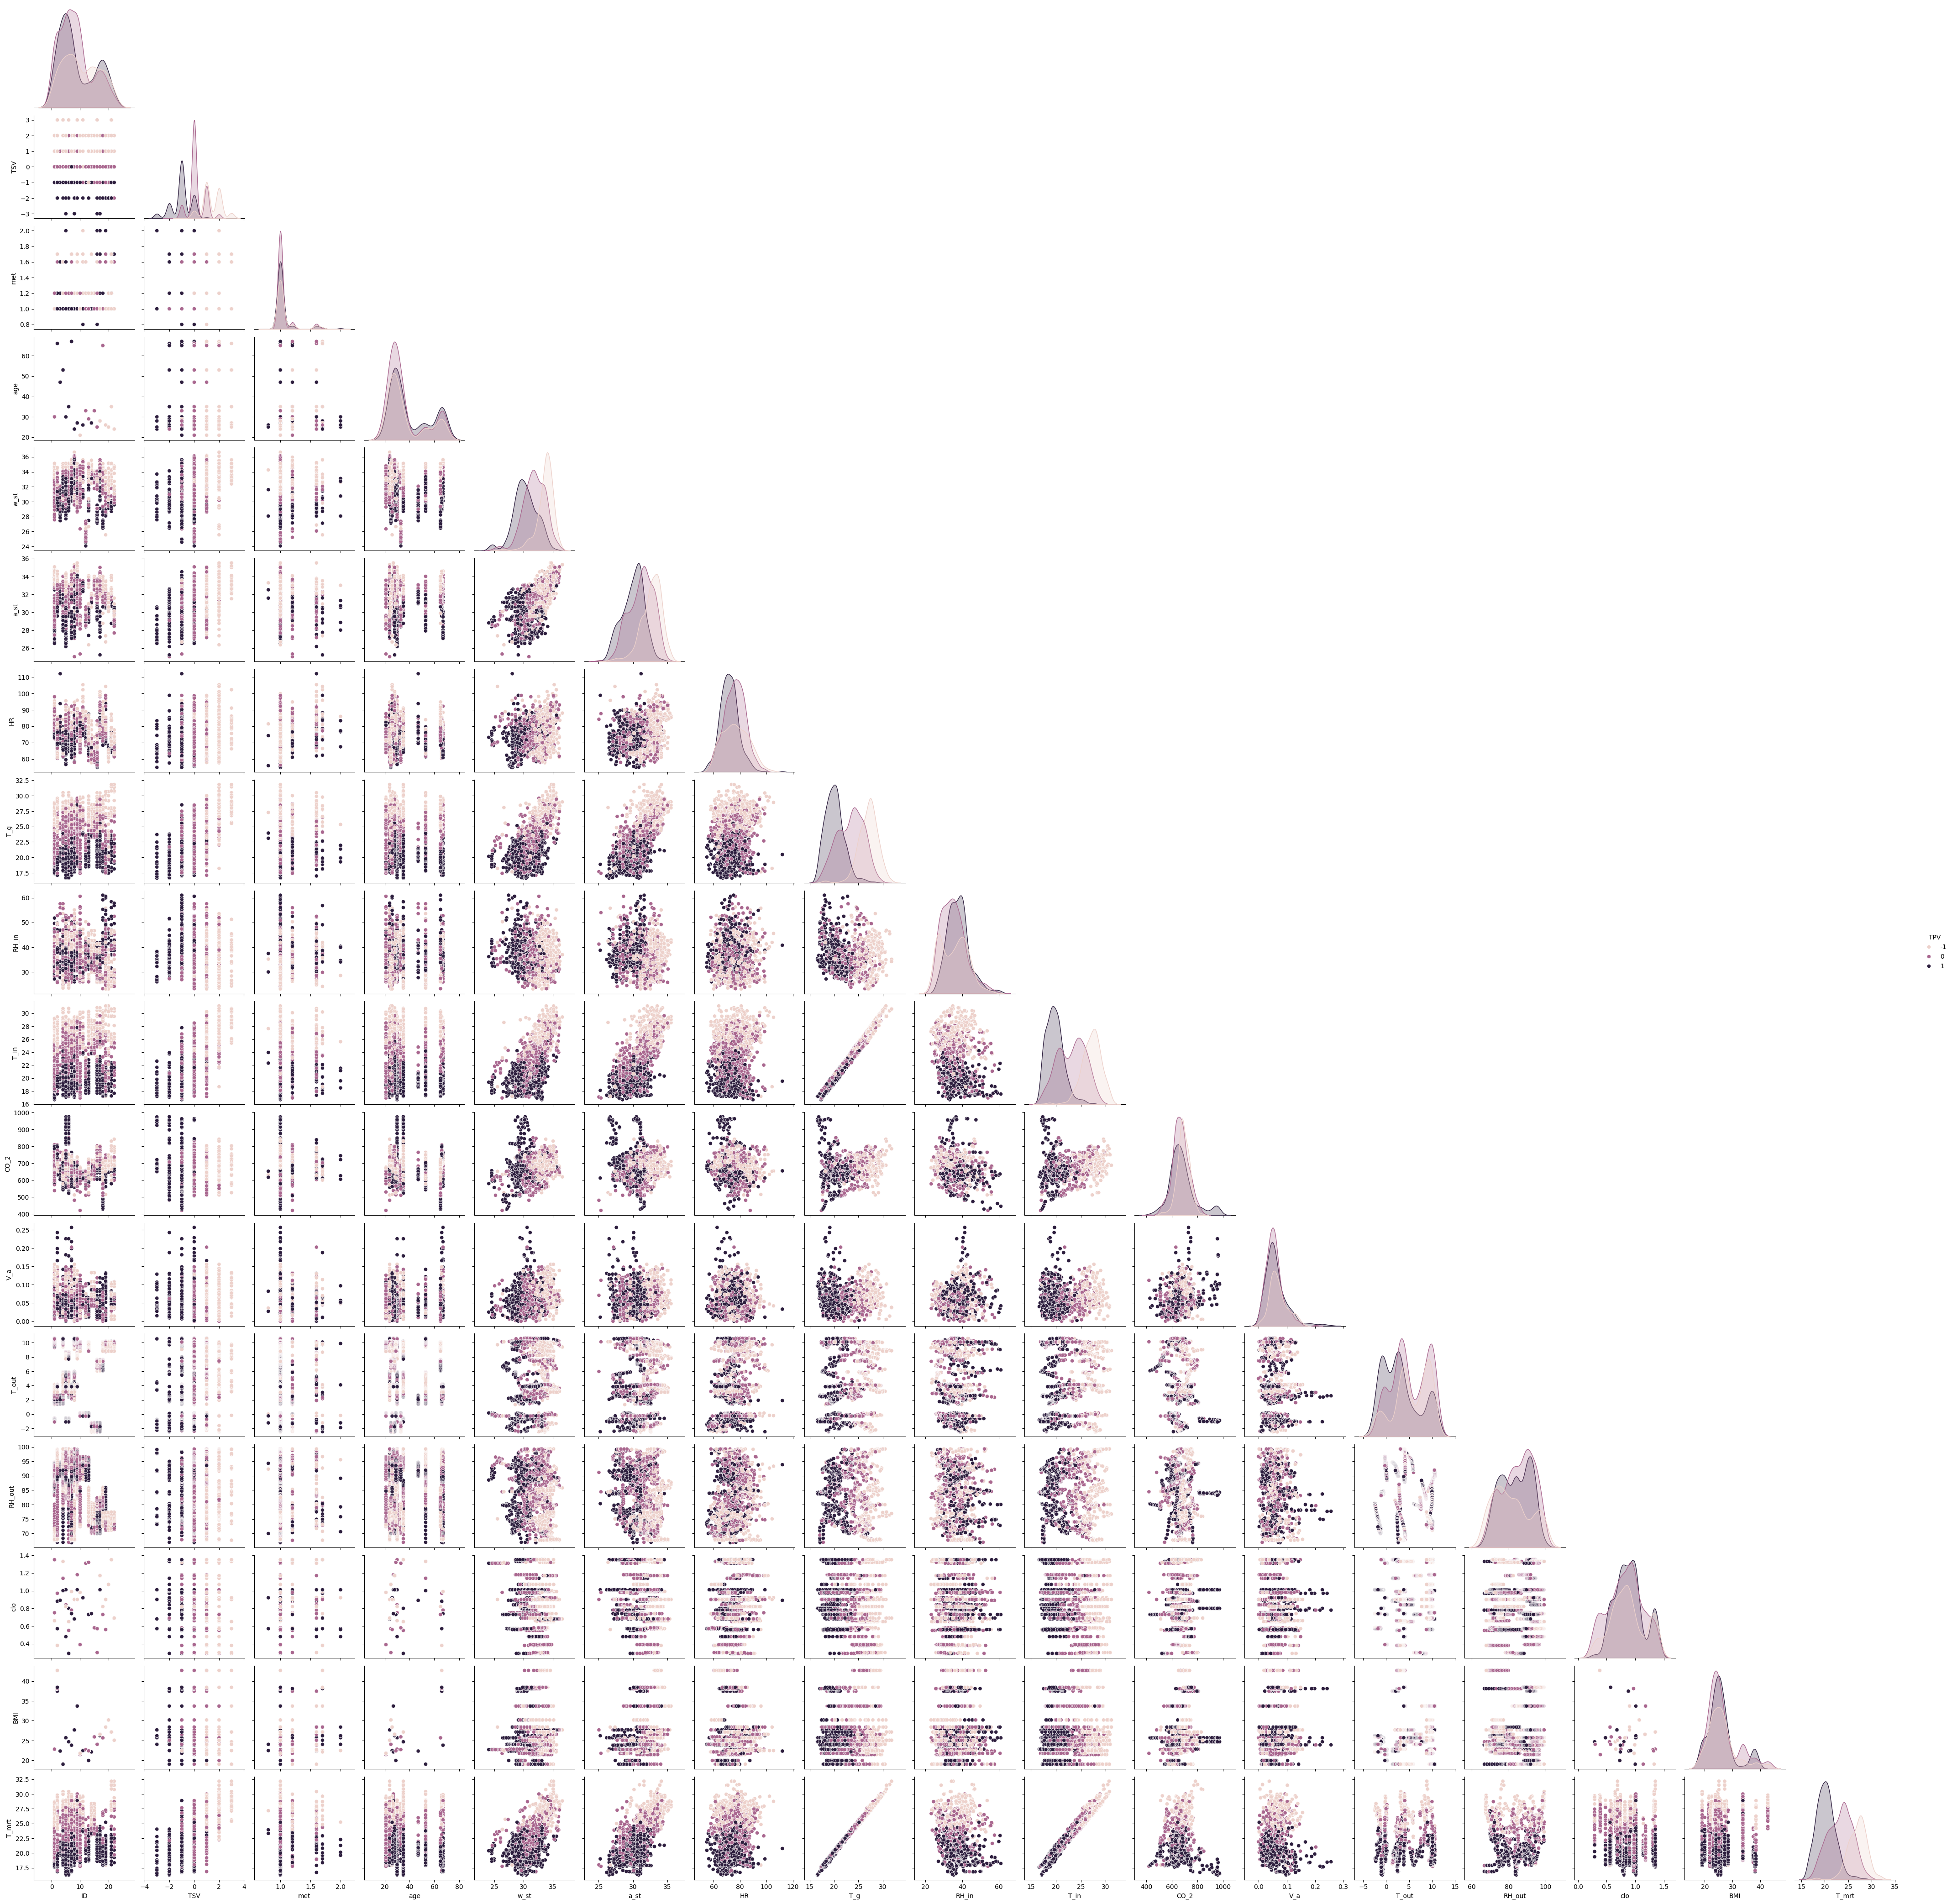

In [ ]:
# Pair plot
plt.figure(figsize=(20, 20))
sns.pairplot(processed_data, hue='TPV', corner=True)
plt.savefig('../EDA_plots/pair_plot.png')
plt.show()

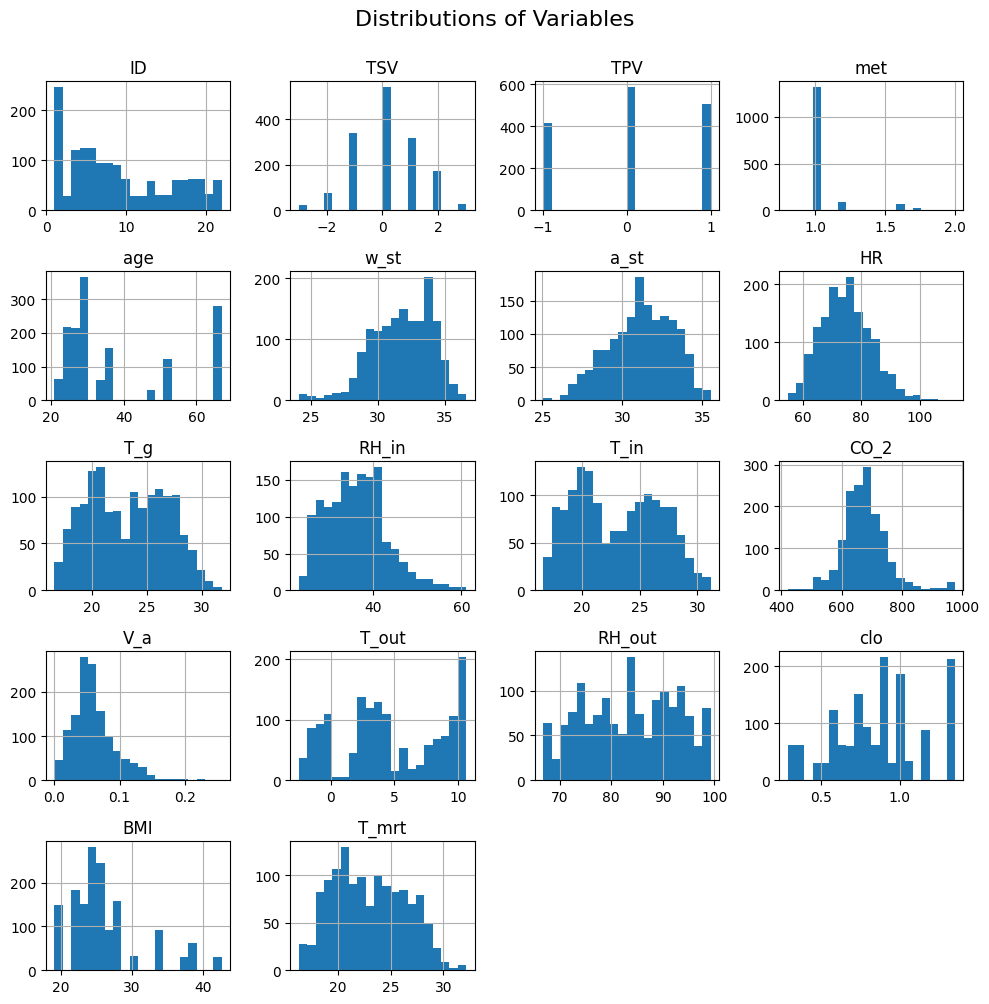

In [ ]:
# Histogram plot for the continuous variables
continuous_data.hist(bins=20, figsize=(10, 10))
plt.suptitle("Distributions of Variables", size=16, y=1)  
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

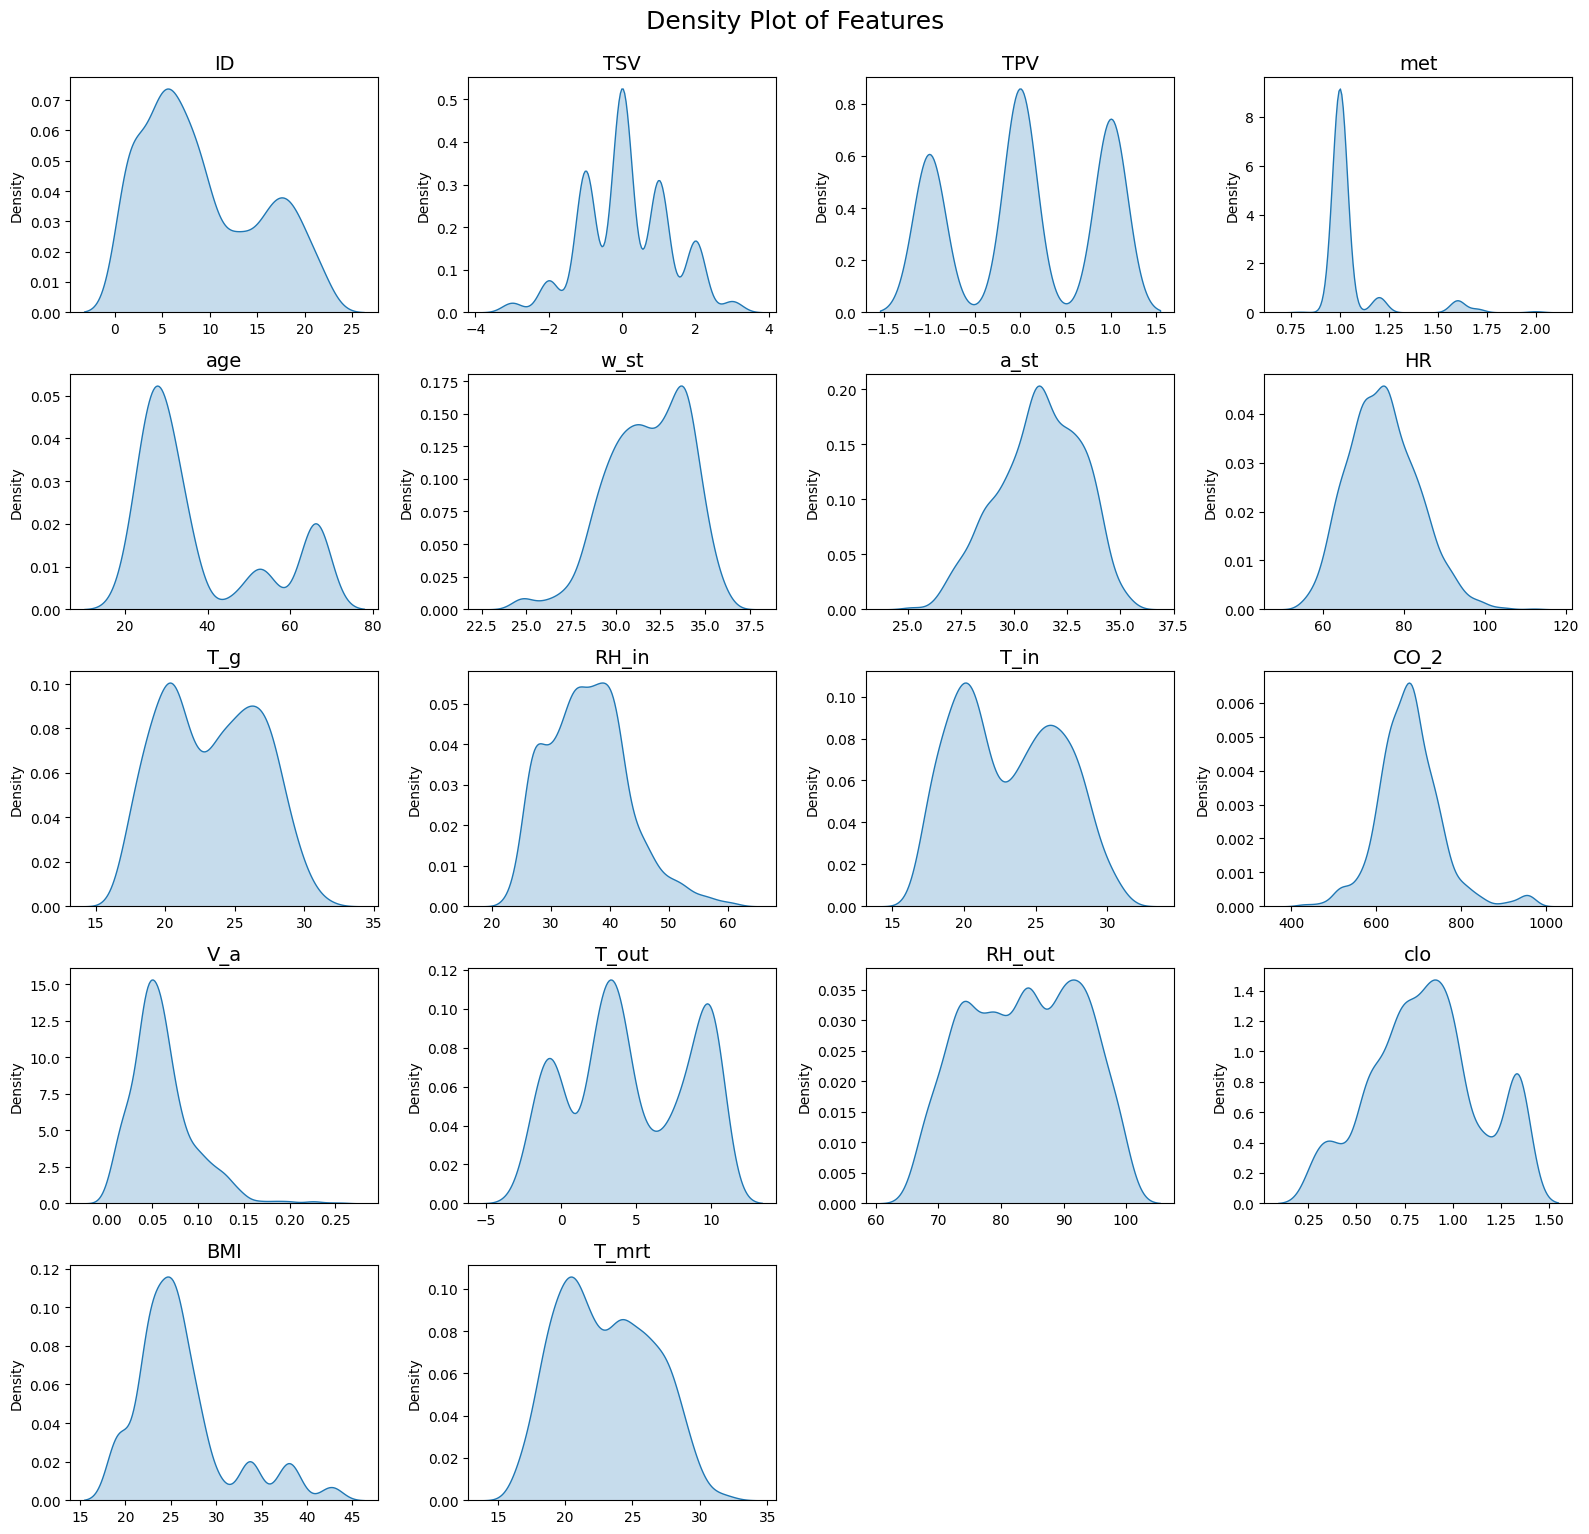

In [ ]:
#Density plot
num_cols = len(continuous_data.columns)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 3))
axes = axes.flatten()

for i, column in enumerate(continuous_data.columns):
    sns.kdeplot(continuous_data[column], ax=axes[i], fill=True, label=column)    
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle('Density Plot of Features', fontsize=18, y=1.02)
plt.savefig('../EDA_plots/density_plot.png', bbox_inches='tight')
plt.show()


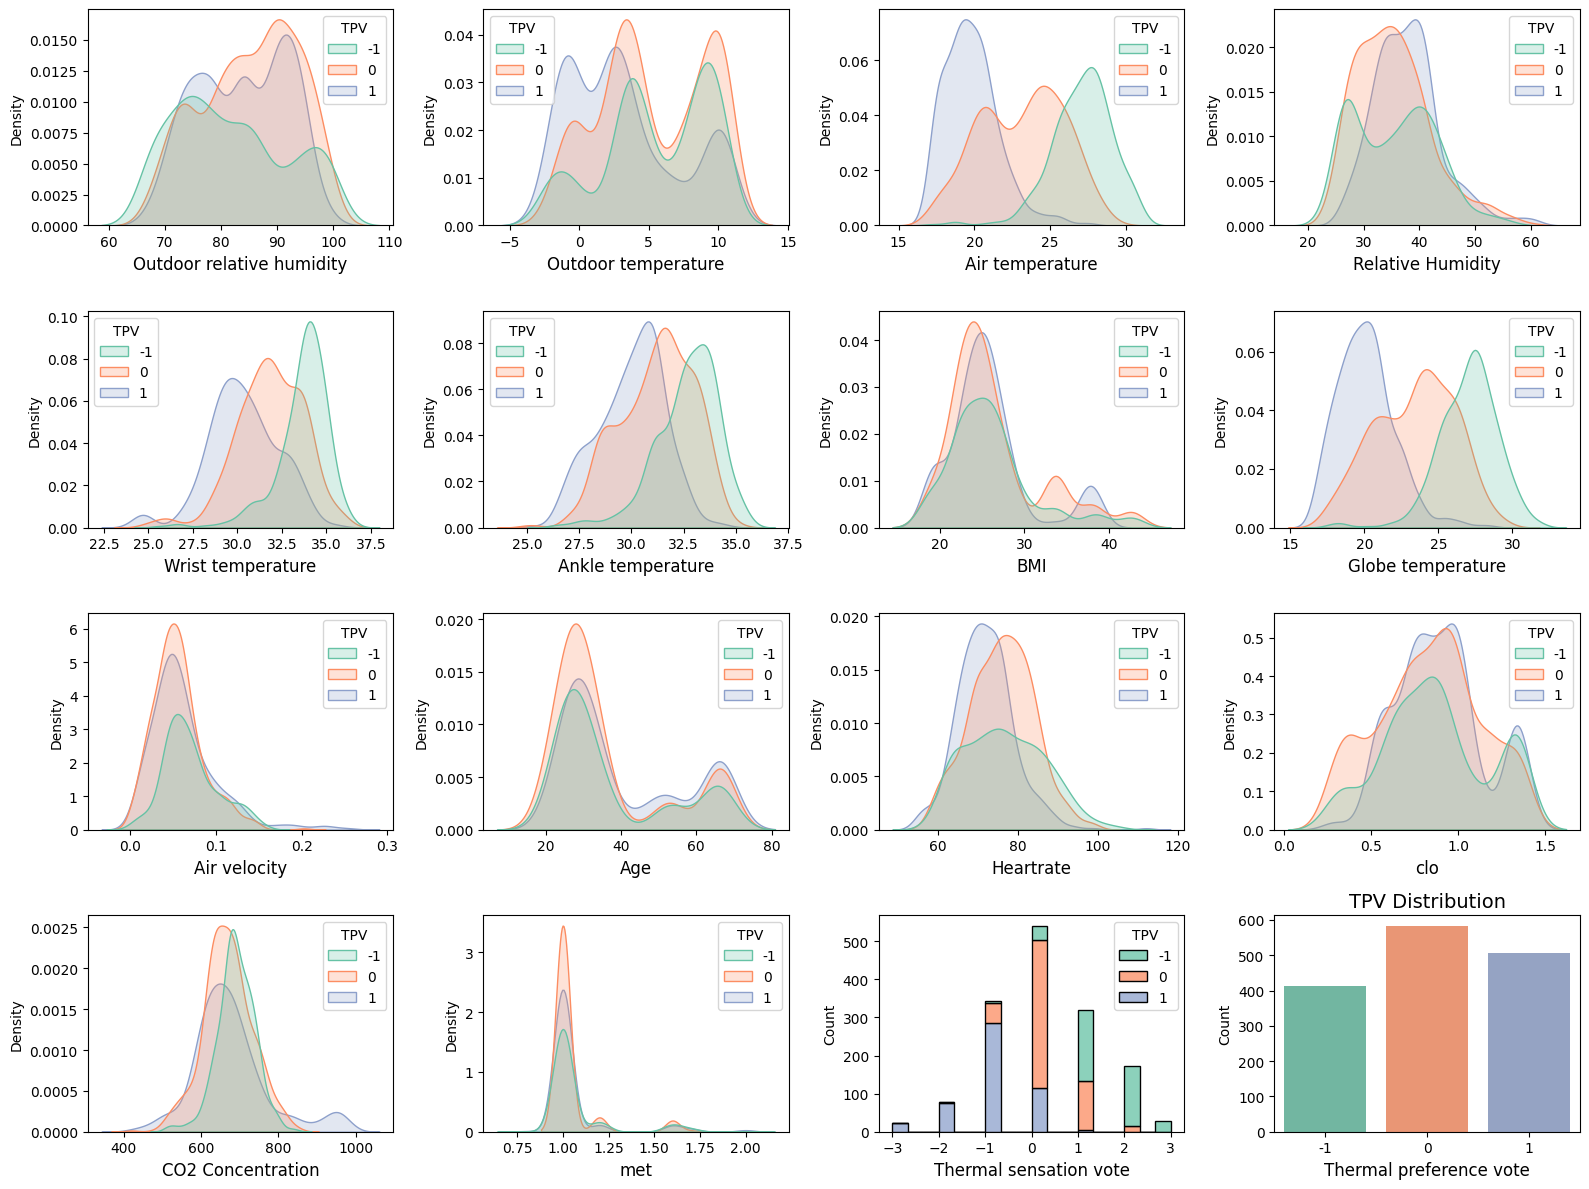

In [ ]:
#Density plot for each tpv class
selected_columns = ['RH_out','T_out','T_in','RH_in','w_st','a_st','BMI','T_g','V_a','age','HR','clo','CO_2', 'met', 'TSV']
column_rename_map = {
    'RH_out': 'Outdoor relative humidity',
    'T_out': 'Outdoor temperature',
    'T_in': 'Air temperature',
    'RH_in': 'Relative Humidity',
    'w_st': 'Wrist temperature',
    'a_st': 'Ankle temperature',
    'BMI': 'BMI',
    'T_g': 'Globe temperature',
    'V_a': 'Air velocity',
    'age': 'Age',
    'HR': 'Heartrate',
    'TSV': 'Thermal sensation vote',
    'CO_2': 'CO2 Concentration',
    'clo': 'clo',
    'met': 'met'
}

plot_data = processed_data[selected_columns + ['TPV']].copy()
plot_data.rename(columns=column_rename_map, inplace=True)

renamed_plot_columns = [column_rename_map[col] for col in selected_columns]

num_cols = len(renamed_plot_columns)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 3))
axes = axes.flatten()

for i, column in enumerate(renamed_plot_columns):
    if column == 'Thermal sensation vote':
        sns.histplot(data=plot_data, x=column, hue='TPV', multiple='stack', ax=axes[i], palette='Set2')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel(column, fontsize=12)
    else:
        sns.kdeplot(data=plot_data, x=column, hue='TPV', ax=axes[i], fill=True, palette='Set2', legend=True)
        axes[i].set_ylabel('Density')
        axes[i].set_xlabel(column, fontsize=12)

if len(axes) > len(renamed_plot_columns):
    ax = axes[len(renamed_plot_columns)]
    sns.countplot(data=plot_data, x='TPV', hue = 'TPV', palette='Set2', ax=ax, legend = False)
    ax.set_xlabel('Thermal preference vote', fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title('TPV Distribution', fontsize=14)
    

plt.tight_layout()
plt.savefig('../EDA_plots/density_plot_tpv.png', bbox_inches='tight')
plt.show()

sex
Female    861
Male      641
Name: count, dtype: int64


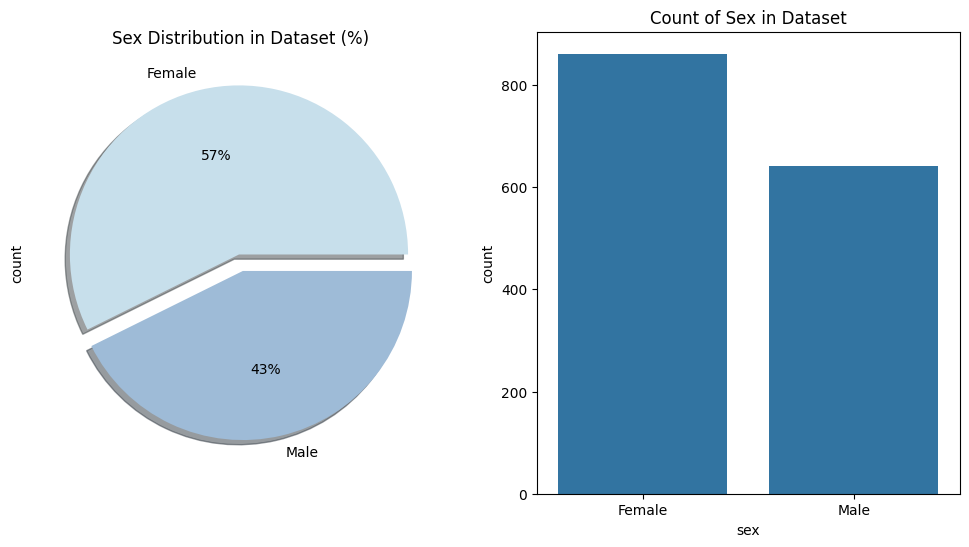

In [ ]:
# Sex distribution
print(processed_data.sex.value_counts())
f, ax = plt.subplots(1, 2, figsize=(12, 6))
explode = [0.05, 0.05]  
processed_data.sex.value_counts().plot.pie(explode=explode,colors = sns.color_palette('ch:s=.25,rot=-.25'), autopct='%1.0f%%', ax=ax[0], shadow=True)
sns.countplot(data=processed_data, x='sex', ax=ax[1])
ax[0].set_title('Sex Distribution in Dataset (%)')
ax[1].set_title('Count of Sex in Dataset')
plt.show()

TPV
 0    584
 1    505
-1    413
Name: count, dtype: int64


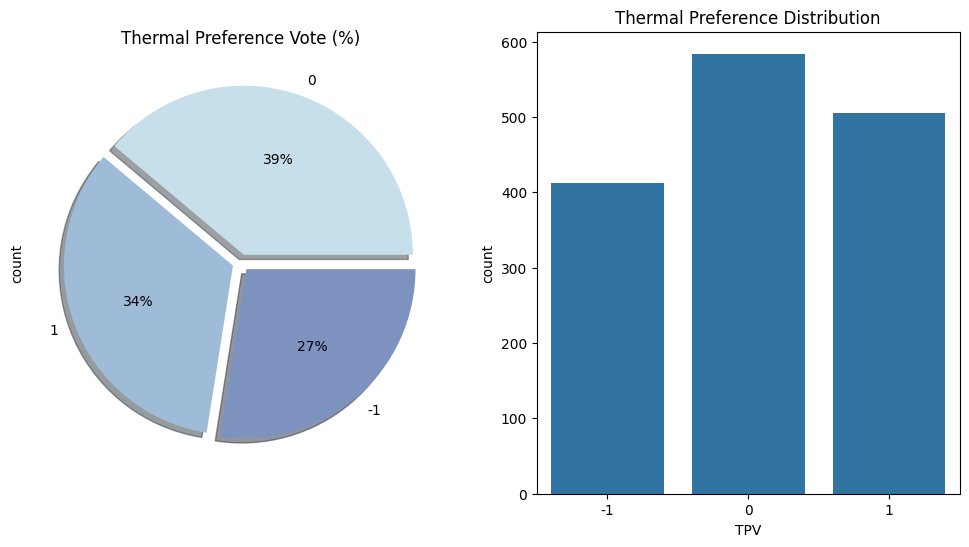

In [ ]:
# Unique value count for TPV
print(processed_data.TPV.value_counts())
f, ax = plt.subplots(1, 2, figsize=(12, 6))
explode = [0.05, 0.05, 0.05]  
processed_data.TPV.value_counts().plot.pie(explode=explode,colors = sns.color_palette('ch:s=.25,rot=-.25'), autopct='%1.0f%%', ax=ax[0], shadow=True)
sns.countplot(data=processed_data, x='TPV', ax=ax[1])
ax[0].set_title('Thermal Preference Vote (%)')
ax[1].set_title('Thermal Preference Distribution')
plt.show()

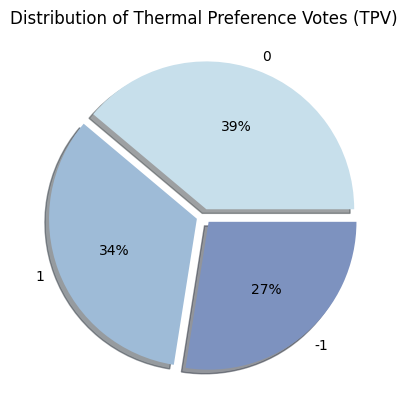

In [ ]:
explode = (0.05, 0.05, 0.05) 
processed_data['TPV'].value_counts().plot.pie(explode=explode,colors=sns.color_palette('ch:s=.25,rot=-.25'),shadow =True, autopct='%1.0f%%')
plt.title("Distribution of Thermal Preference Votes (TPV)")
plt.ylabel('')
plt.savefig('../EDA_plots/tpv_pie_chart.png', bbox_inches='tight')
plt.show()

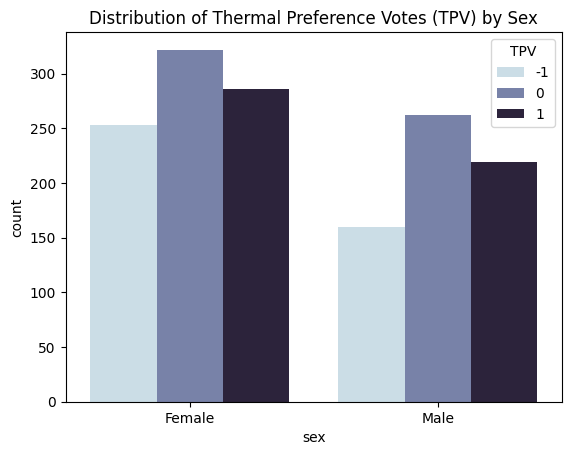

In [ ]:
#Distribution of Thermal Preference Votes (TPV) by Sex
sns.countplot(processed_data, x='sex', hue='TPV', palette='ch:s=.25,rot=-.25')
plt.title("Distribution of Thermal Preference Votes (TPV) by Sex")
plt.show()

Correlation Analysis

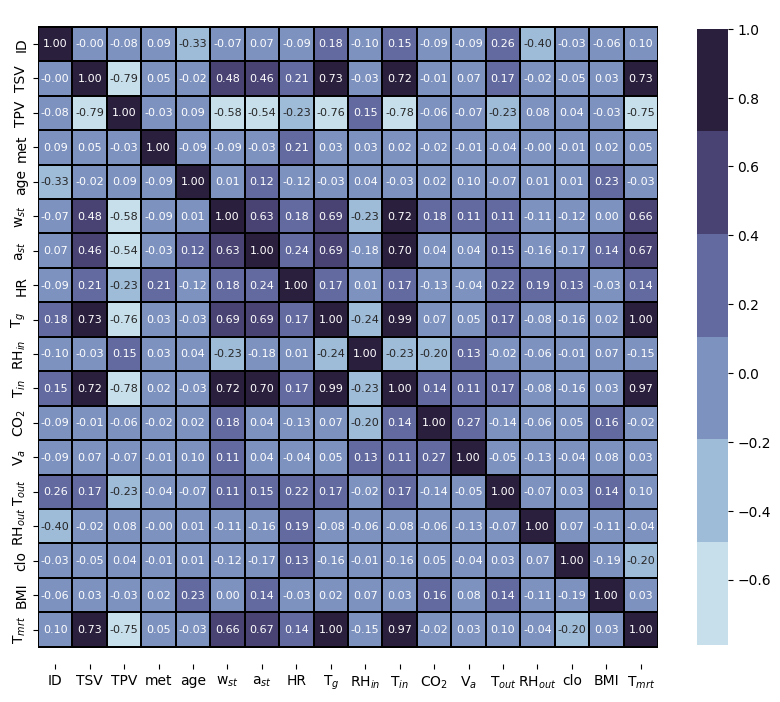

In [ ]:
#Pearson Correlation of features with heatmap
corr_matrix = continuous_data.corr()
label_map = {
    'TPV': 'TPV',
    'TSV': 'TSV',
    'w_st': 'w$_{st}$',
    'a_st': 'a$_{st}$',
    'V_a': 'V$_{a}$',
    'T_in': 'T$_{in}$',
    'CO_2': 'CO$_2$',
    'RH_in': 'RH$_{in}$',
    'HR': 'HR',
    'T_g': 'T$_{g}$',
    'T_out': 'T$_{out}$',
    'RH_out': 'RH$_{out}$',
    'BMI': 'BMI',
    'T_mrt': 'T$_{mrt}$',
    'age': 'age',
    'sex': 'sex',
    'met': 'met'
}

formatted_labels = [label_map.get(col, col) for col in corr_matrix.columns]
corr_matrix.columns = formatted_labels
corr_matrix.index = formatted_labels
#plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix,
            linewidths=0.1,
            linecolor='black',
            cmap=sns.color_palette('ch:s=.25,rot=-.25'),
            annot=True,
            fmt=".2f",               # 2 decimal places
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8},
            ax=ax)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('../EDA_plots/heatmap.png', bbox_inches='tight')
plt.show()


In [ ]:
corr_matrix

ID       TSV       TPV       met       age  w$_{st}$  \
ID          1.000000 -0.002174 -0.083664  0.094745 -0.326331 -0.065996   
TSV        -0.002174  1.000000 -0.789565  0.048663 -0.020953  0.475665   
TPV        -0.083664 -0.789565  1.000000 -0.033038  0.087286 -0.577495   
met         0.094745  0.048663 -0.033038  1.000000 -0.086532 -0.088096   
age        -0.326331 -0.020953  0.087286 -0.086532  1.000000  0.008305   
w$_{st}$   -0.065996  0.475665 -0.577495 -0.088096  0.008305  1.000000   
a$_{st}$    0.065396  0.461708 -0.537326 -0.029280  0.117189  0.628797   
HR         -0.094240  0.210950 -0.225611  0.209944 -0.117446  0.177482   
T$_{g}$     0.179257  0.725210 -0.763239  0.029816 -0.034923  0.694265   
RH$_{in}$  -0.100144 -0.028834  0.145573  0.032329  0.039237 -0.234323   
T$_{in}$    0.152941  0.721179 -0.777457  0.023571 -0.034506  0.718480   
CO$_2$     -0.087091 -0.014170 -0.061202 -0.016411  0.019574  0.180046   
V$_{a}$    -0.094436  0.066918 -0.069914 -0.010672  0.096270  0.113929   
T$_{out}$   0.260749  0.168036 -0.230718 -0.036404 -0.066287  0.107356   
RH$_{out}$ -0.404948 -0.016629  0.077407 -0.001370  0.012142 -0.110471   
clo        -0.031244 -0.048409  0.039915 -0.007819  0.012586 -0.117686   
BMI        -0.056924  0.029602 -0.028197  0.015898  0.225293  0.004131   
T$_{mrt}$   0.098047  0.727144 -0.749736  0.050996 -0.027491  0.660360   

            a$_{st}$        HR   T$_{g}$  RH$_{in}$  T$_{in}$    CO$_2$  \
ID          0.065396 -0.094240  0.179257  -0.100144  0.152941 -0.087091   
TSV         0.461708  0.210950  0.725210  -0.028834  0.721179 -0.014170   
TPV        -0.537326 -0.225611 -0.763239   0.145573 -0.777457 -0.061202   
met        -0.029280  0.209944  0.029816   0.032329  0.023571 -0.016411   
age         0.117189 -0.117446 -0.034923   0.039237 -0.034506  0.019574   
w$_{st}$    0.628797  0.177482  0.694265  -0.234323  0.718480  0.180046   
a$_{st}$    1.000000  0.244130  0.690345  -0.177591  0.701851  0.040522   
HR          0.244130  1.000000  0.167878   0.009349  0.170077 -0.129461   
T$_{g}$     0.690345  0.167878  1.000000  -0.238394  0.989165  0.070942   
RH$_{in}$  -0.177591  0.009349 -0.238394   1.000000 -0.234470 -0.203851   
T$_{in}$    0.701851  0.170077  0.989165  -0.234470  1.000000  0.136043   
CO$_2$      0.040522 -0.129461  0.070942  -0.203851  0.136043  1.000000   
V$_{a}$     0.043041 -0.038647  0.053524   0.132684  0.109570  0.266868   
T$_{out}$   0.151497  0.222471  0.174851  -0.015924  0.168934 -0.144472   
RH$_{out}$ -0.156796  0.189008 -0.076882  -0.064820 -0.080481 -0.056122   
clo        -0.172935  0.125396 -0.157169  -0.007690 -0.160148  0.053243   
BMI         0.137197 -0.027031  0.015139   0.067394  0.032203  0.156561   
T$_{mrt}$   0.673243  0.143989  0.997476  -0.150999  0.974891 -0.020025   

             V$_{a}$  T$_{out}$  RH$_{out}$       clo       BMI  T$_{mrt}$  
ID         -0.094436   0.260749   -0.404948 -0.031244 -0.056924   0.098047  
TSV         0.066918   0.168036   -0.016629 -0.048409  0.029602   0.727144  
TPV        -0.069914  -0.230718    0.077407  0.039915 -0.028197  -0.749736  
met        -0.010672  -0.036404   -0.001370 -0.007819  0.015898   0.050996  
age         0.096270  -0.066287    0.012142  0.012586  0.225293  -0.027491  
w$_{st}$    0.113929   0.107356   -0.110471 -0.117686  0.004131   0.660360  
a$_{st}$    0.043041   0.151497   -0.156796 -0.172935  0.137197   0.673243  
HR         -0.038647   0.222471    0.189008  0.125396 -0.027031   0.143989  
T$_{g}$     0.053524   0.174851   -0.076882 -0.157169  0.015139   0.997476  
RH$_{in}$   0.132684  -0.015924   -0.064820 -0.007690  0.067394  -0.150999  
T$_{in}$    0.109570   0.168934   -0.080481 -0.160148  0.032203   0.974891  
CO$_2$      0.266868  -0.144472   -0.056122  0.053243  0.156561  -0.020025  
V$_{a}$     1.000000  -0.050533   -0.134887 -0.039383  0.082962   0.033689  
T$_{out}$  -0.050533   1.000000   -0.071658  0.025485  0.136071   0.103695  
RH$_{out}$ -0.134887  -0.07165

In [ ]:
#correlation with respect to target('TPV')
feat_corr_tpv = continuous_data.drop('TPV', axis=1).corrwith(continuous_data.TPV)
feat_corr_tpv


ID       -0.083664
TSV      -0.789565
met      -0.033038
age       0.087286
w_st     -0.577495
a_st     -0.537326
HR       -0.225611
T_g      -0.763239
RH_in     0.145573
T_in     -0.777457
CO_2     -0.061202
V_a      -0.069914
T_out    -0.230718
RH_out    0.077407
clo       0.039915
BMI      -0.028197
T_mrt    -0.749736
dtype: float64

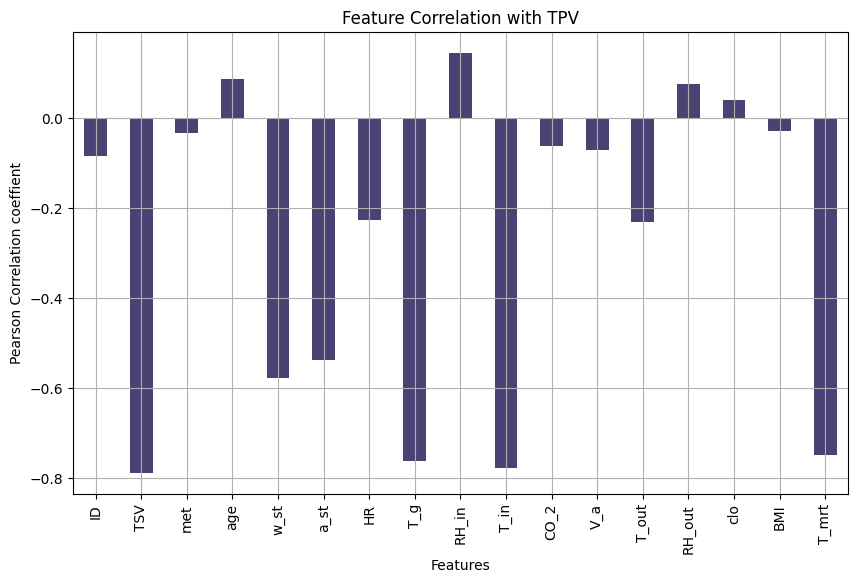

In [ ]:
#plot of correlation
feat_corr_tpv.plot(kind='bar',
                    grid=True,
                    color='#494373',
                    figsize=(10, 6))
plt.title('Feature Correlation with TPV')
plt.ylabel('Pearson Correlation coeffient')
plt.xlabel('Features')
plt.savefig('../EDA_plots/feat_corr_tpv.png', bbox_inches='tight')
plt.show()

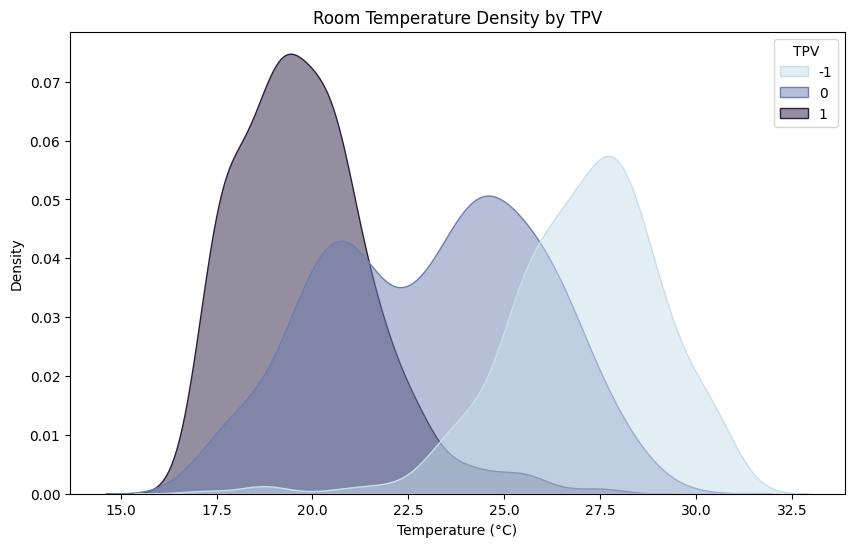

In [ ]:
#Densityplot of TPV against temp
plt.figure(figsize=(10, 6))
sns.kdeplot(data=continuous_data, x='T_in', hue='TPV', palette='ch:s=.25,rot=-.25', fill=True, alpha=0.5)
plt.title('Room Temperature Density by TPV')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.savefig('../EDA_plots/kde_tpv_temp.png', bbox_inches='tight')
plt.show()


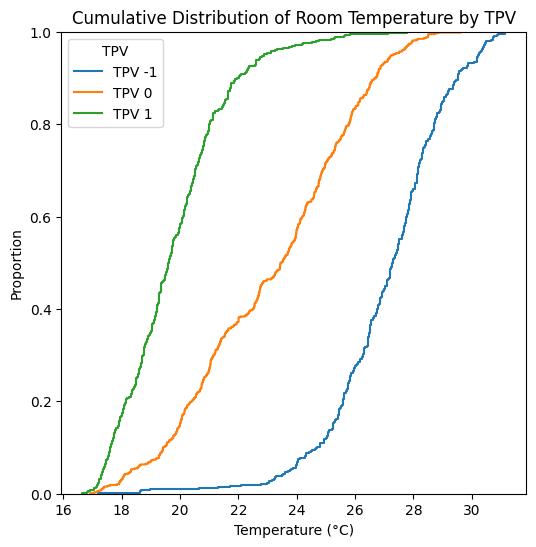

In [ ]:
plt.figure(figsize=(6, 6))
for tpv in sorted(continuous_data['TPV'].unique()):
    sns.ecdfplot(data=continuous_data[continuous_data['TPV'] == tpv], x='T_in', label=f'TPV {tpv}')
plt.title('Cumulative Distribution of Room Temperature by TPV')
plt.xlabel('Temperature (°C)')
plt.ylabel('Proportion')
plt.legend(title='TPV')
plt.savefig('../EDA_plots/ecdf_tpv_temp.png', bbox_inches='tight')
plt.show()


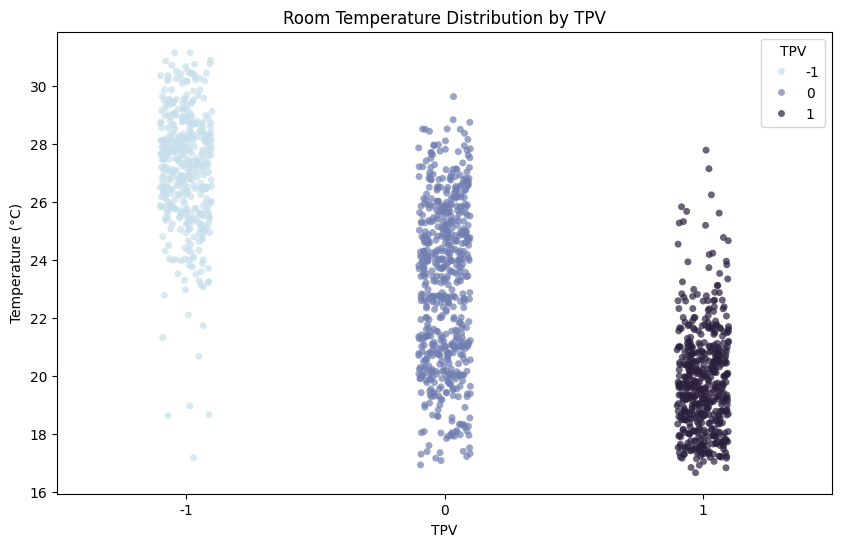

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='TPV', y='T_in', data=continuous_data, palette='ch:s=.25,rot=-.25', hue= 'TPV',jitter=True, alpha=0.7)
plt.title('Room Temperature Distribution by TPV')
plt.xlabel('TPV')
plt.ylabel('Temperature (°C)')
plt.savefig('../EDA_plots/stri_tpv_temp.png', bbox_inches='tight')
plt.show()


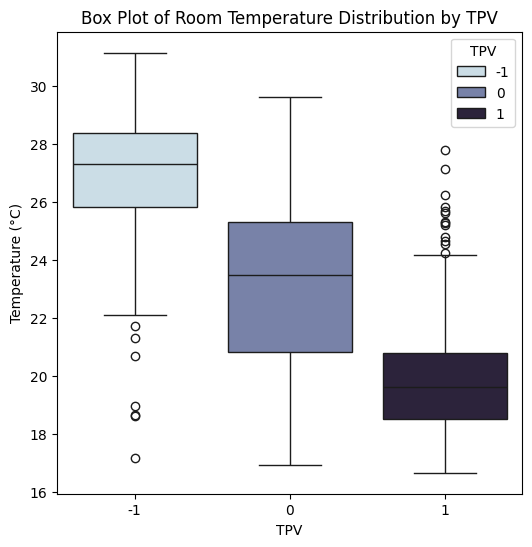

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='TPV', y='T_in', data=continuous_data, palette='ch:s=.25,rot=-.25', hue='TPV')
plt.title('Box Plot of Room Temperature Distribution by TPV')
plt.xlabel('TPV')
plt.ylabel('Temperature (°C)')
plt.savefig('../EDA_plots/box_tpv_temp.png', bbox_inches='tight')
plt.show()